In [1]:
# Import Libraries

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Read urban population

df_urban = pd.read_csv('API_SP.URB.TOTL_DS2_en_csv_v2_12209.csv', skiprows=4)
df_urban.head()

Country Name Country Code    Indicator Name Indicator Code  \
0                        Aruba          ABW  Urban population    SP.URB.TOTL   
1  Africa Eastern and Southern          AFE  Urban population    SP.URB.TOTL   
2                  Afghanistan          AFG  Urban population    SP.URB.TOTL   
3   Africa Western and Central          AFW  Urban population    SP.URB.TOTL   
4                       Angola          AGO  Urban population    SP.URB.TOTL   

         1960        1961        1962        1963        1964        1965  \
0     27728.0     28330.0     28764.0     29157.0     29505.0     29802.0   
1  19033821.0  19872354.0  20770791.0  21737424.0  22773061.0  23870852.0   
2    724373.0    763336.0    805062.0    849446.0    896820.0    947332.0   
3  14301917.0  14986610.0  15707826.0  16480638.0  17302426.0  18177351.0   
4    559023.0    587555.0    618618.0    650924.0    684074.0    717302.0   

   ...         2014         2015         2016         2017         2018  \
0  ...      44588.0      44943.0      45297.0      45648.0      45999.0   
1  ...  198073453.0  206556403.0  215083441.0  223732229.0  232922327.0   
2  ...    8043935.0    8371880.0    8665979.0    8999963.0    9353296.0   
3  ...  175773257.0  183117253.0  190684610.0  198494008.0  206492202.0   
4  ...   17017877.0   17845914.0   18702478.0   19586972.0   20488542.0   

          2019         2020         2021         2022  Unnamed: 67  
0      46351.0      46574.0      46734.0      46891.0          NaN  
1  242451140.0  252315481.0  262377061.0  272666107.0          NaN  
2    9727157.0   10142913.0   10551772.0   10946834.0          NaN  
3  214684207.0  223107995.0  231704052.0  240494466.0          NaN  
4   21410634.0   22338586.0   23276246.0   24229338.0          NaN  

[5 rows x 68 columns]

In [3]:
# Read total population

df_total_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_79.csv', skiprows=4)
df_total_population.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         2017  \
0      58782.0  ...     103594.0     104257.0     104874.0     105439.0   
1  149742351.0  ...  583651101.0  600008424.0  616377605.0  632746570.0   
2    9565147.0  ...   32716210.0   33753499.0   34636207.0   35643418.0   
3  108336203.0  ...  397855507.0  408690375.0  419778384.0  431138704.0   
4    5736582.0  ...   27128337.0   28127721.0   29154746.0   30208628.0   

          2018         2019         2020         2021         2022  \
0     105962.0     106442.0     106585.0     106537.0     106445.0   
1  649757148.0  667242986.0  685112979.0  702977106.0  720859132.0   
2   36686784.0   37769499.0   38972230.0   40099462.0   41128771.0   
3  442646825.0  454306063.0  466189102.0  478185907.0  490330870.0   
4   31273533.0   32353588.0   33428486.0   34503774.0   35588987.0   

   Unnamed: 67  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 68 columns]

In [22]:
# Read natural earth data

natural_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
subset_natural_earth = natural_earth[['iso_a3', 'geometry']]
subset_natural_earth.head()

C:\Users\Asad Naseer\AppData\Local\Temp\ipykernel_16184\1466126280.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



iso_a3                                           geometry
0    FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    TZA  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    ESH  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    CAN  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    USA  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

# TASK 1: Visualisation and Analytics of Geospatial Data

### To do Task 1 I have filtered all the columns required to do this task so I am filtering out the years from urban and total population

In [5]:
# Filter the urban population dataset

df_selected_urban_years = df_urban.loc[:, ['Country Code'] + [str(year) for year in range(2000, 2022)]]
df_selected_urban_years.head()

Country Code         2000         2001         2002         2003  \
0          ABW      41625.0      42025.0      42194.0      42277.0   
1          AFE  115551653.0  119775502.0  124227507.0  128833965.0   
2          AFG    4314700.0    4364773.0    4674867.0    5061866.0   
3          AFW   95272890.0   99624942.0  104163982.0  108909607.0   
4          AGO    8211294.0    8686629.0    9189142.0    9722803.0   

          2004         2005         2006         2007         2008  ...  \
0      42317.0      42399.0      42555.0      42729.0      42906.0  ...   
1  133647466.0  138745587.0  144026740.0  149231302.0  155383774.0  ...   
2    5299549.0    5542073.0    5828215.0    5987030.0    6162823.0  ...   
3  113875177.0  119079574.0  124507242.0  130133054.0  135972155.0  ...   
4   10291645.0   10892537.0   11444951.0   12028087.0   12642253.0  ...   

          2012         2013         2014         2015         2016  \
0      43864.0      44228.0      44588.0      44943.0      45297.0   
1  182558745.0  190108778.0  198073453.0  206556403.0  215083441.0   
2    7360701.0    7687539.0    8043935.0    8371880.0    8665979.0   
3  161743874.0  168643432.0  175773257.0  183117253.0  190684610.0   
4   15432363.0   16211664.0   17017877.0   17845914.0   18702478.0   

          2017         2018         2019         2020         2021  
0      45648.0      45999.0      46351.0      46574.0      46734.0  
1  223732229.0  232922327.0  242451140.0  252315481.0  262377061.0  
2    8999963.0    9353296.0    9727157.0   10142913.0   10551772.0  
3  198494008.0  206492202.0  214684207.0  223107995.0  231704052.0  
4   19586972.0   20488542.0   21410634.0   22338586.0   23276246.0  

[5 rows x 23 columns]

In [6]:
# Filter the total population dataset

df_selected_pop_years = df_total_population.loc[:, ['Country Code'] + [str(year) for year in range(2000, 2022)]]
df_selected_pop_years.head()

Country Code         2000         2001         2002         2003  \
0          ABW      89101.0      90691.0      91781.0      92701.0   
1          AFE  401600588.0  412001885.0  422741118.0  433807484.0   
2          AFG   19542982.0   19688632.0   21000256.0   22645130.0   
3          AFW  269611898.0  277160097.0  284952322.0  292977949.0   
4          AGO   16394062.0   16941587.0   17516139.0   18124342.0   

          2004         2005         2006         2007         2008  ...  \
0      93540.0      94483.0      95606.0      96787.0      97996.0  ...   
1  445281555.0  457153837.0  469508516.0  482406426.0  495748900.0  ...   
2   23553551.0   24411191.0   25442944.0   25903301.0   26427199.0  ...   
3  301265247.0  309824829.0  318601484.0  327612838.0  336893835.0  ...   
4   18771125.0   19450959.0   20162340.0   20909684.0   21691522.0  ...   

          2012         2013         2014         2015         2016  \
0     102112.0     102880.0     103594.0     104257.0     104874.0   
1  552530654.0  567892149.0  583651101.0  600008424.0  616377605.0   
2   30466479.0   31541209.0   32716210.0   33753499.0   34636207.0   
3  376797999.0  387204553.0  397855507.0  408690375.0  419778384.0   
4   25188292.0   26147002.0   27128337.0   28127721.0   29154746.0   

          2017         2018         2019         2020         2021  
0     105439.0     105962.0     106442.0     106585.0     106537.0  
1  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0  
2   35643418.0   36686784.0   37769499.0   38972230.0   40099462.0  
3  431138704.0  442646825.0  454306063.0  466189102.0  478185907.0  
4   30208628.0   31273533.0   32353588.0   33428486.0   34503774.0  

[5 rows x 23 columns]

In [7]:
# Merge both datasets with the Natural Earth dataset to filter out correct country codes. 
# For example, 'World' is not a country, so after merging with the Natural Earth dataset, it will be removed.

gdf_total = subset_natural_earth.merge(df_selected_urban_years, left_on="iso_a3", right_on="Country Code", how='left', suffixes=('_natural_earth', '_urban'))
gdf_total = gdf_total.merge(df_selected_pop_years, left_on="iso_a3", right_on="Country Code", how='left', suffixes=('_urban', '_total_population'))
gdf_total.head()

iso_a3                                           geometry  \
0    FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    TZA  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2    ESH  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3    CAN  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4    USA  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

  Country Code_urban   2000_urban   2001_urban   2002_urban   2003_urban  \
0                FJI     398838.0     406358.0     413829.0     421300.0   
1                TZA    7688508.0    8029877.0    8377308.0    8814911.0   
2                NaN          NaN          NaN          NaN          NaN   
3                CAN   24388404.0   24757782.0   25052940.0   25304780.0   
4                USA  223069137.0  225792302.0  228400290.0  230876596.0   

    2004_urban   2005_urban   2006_urban  ...  2012_total_population  \
0     428832.0     436333.0     443873.0  ...               911059.0   
1    9292156.0    9798745.0   10334400.0  ...             47786137.0   
2          NaN          NaN          NaN  ...                    NaN   
3   25566897.0   25834340.0   26126316.0  ...             34714222.0   
4  233532722.0  236200507.0  238999326.0  ...            313877662.0   

   2013_total_population  2014_total_population  2015_total_population  \
0               913453.0               915560.0               917200.0   
1             49253643.0             50814552.0             52542823.0   
2                    NaN                    NaN                    NaN   
3             35082954.0             35437435.0             35702908.0   
4            316059947.0            318386329.0            320738994.0   

   2016_total_population  2017_total_population  2018_total_population  \
0               918371.0               919019.0               918996.0   
1             54401802.0             56267032.0             58090443.0   
2                    NaN                    NaN                    NaN   
3             36109487.0             36545236.0             37065084.0   
4            323071755.0            325122128.0            326838199.0   

   2019_total_population  2020_total_population  2021_total_population  
0               918465.0               920422.0               924610.0  
1             59872579.0             61704518.0             63588334.0  
2                    NaN                    NaN                    NaN  
3             37601230.0             38007166.0             38226498.0  
4            328329953.0            331511512.0            332031554.0  

[5 rows x 48 columns]

In [8]:
# Checking for null values in each column of the merged DataFrame (gdf_total)

null_counts = gdf_total.isnull().sum()
null_counts

iso_a3                           0
geometry                         0
Country Code_urban               8
2000_urban                       8
2001_urban                       8
2002_urban                       8
2003_urban                       8
2004_urban                       8
2005_urban                       8
2006_urban                       8
2007_urban                       8
2008_urban                       8
2009_urban                       8
2010_urban                       8
2011_urban                       8
2012_urban                       8
2013_urban                       8
2014_urban                       8
2015_urban                       8
2016_urban                       8
2017_urban                       8
2018_urban                       8
2019_urban                       8
2020_urban                       8
2021_urban                       8
Country Code_total_population    8
2000_total_population            8
2001_total_population            8
2002_total_populatio

In [9]:
# Filtering rows in the merged DataFrame (gdf_total) that contain at least one null value across any column.
# The resulting DataFrame (null_data) contains rows with missing data

null_data = gdf_total[gdf_total.isnull().any(axis=1)]
null_data

iso_a3                                           geometry  \
2      ESH  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
20     FLK  POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...   
23     ATF  POLYGON ((68.93500 -48.62500, 69.58000 -48.940...   
140    TWN  POLYGON ((121.77782 24.39427, 121.17563 22.790...   
159    ATA  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...   
160    CYN  POLYGON ((32.73178 35.14003, 32.80247 35.14550...   
167    SOL  POLYGON ((48.94820 11.41062, 48.94820 11.41062...   
174    -99  POLYGON ((20.59025 41.85541, 20.52295 42.21787...   

    Country Code_urban  2000_urban  2001_urban  2002_urban  2003_urban  \
2                  NaN         NaN         NaN         NaN         NaN   
20                 NaN         NaN         NaN         NaN         NaN   
23                 NaN         NaN         NaN         NaN         NaN   
140                NaN         NaN         NaN         NaN         NaN   
159                NaN         NaN         NaN         NaN         NaN   
160                NaN         NaN         NaN         NaN         NaN   
167                NaN         NaN         NaN         NaN         NaN   
174                NaN         NaN         NaN         NaN         NaN   

     2004_urban  2005_urban  2006_urban  ...  2012_total_population  \
2           NaN         NaN         NaN  ...                    NaN   
20          NaN         NaN         NaN  ...                    NaN   
23          NaN         NaN         NaN  ...                    NaN   
140         NaN         NaN         NaN  ...                    NaN   
159         NaN         NaN         NaN  ...                    NaN   
160         NaN         NaN         NaN  ...                    NaN   
167         NaN         NaN         NaN  ...                    NaN   
174         NaN         NaN         NaN  ...                    NaN   

     2013_total_population  2014_total_population  2015_total_population  \
2                      NaN                    NaN                    NaN   
20                     NaN                    NaN                    NaN   
23                     NaN                    NaN                    NaN   
140                    NaN                    NaN                    NaN   
159                    NaN                    NaN                    NaN   
160                    NaN                    NaN                    NaN   
167                    NaN                    NaN                    NaN   
174                    NaN                    NaN                    NaN   

     2016_total_population  2017_total_population  2018_total_population  \
2                      NaN                    NaN                    NaN   
20                     NaN                    NaN                    NaN   
23                     NaN                    NaN                    NaN   
140                    NaN                    NaN                    NaN   
159                    NaN                    NaN                    NaN   
160                    NaN                    NaN                    NaN   
167                    NaN                    NaN                    NaN   
174                    NaN                    NaN                    NaN   

     2019_total_population  2020_total_population  2021_total_population  
2                      NaN                    NaN                    NaN  
20                     NaN                    NaN                    NaN  
23                     NaN                    NaN                    NaN  
140                    NaN                    NaN                    NaN  
159                    NaN                    NaN                    NaN  
160                    NaN                    NaN                    NaN  
167                    NaN                    NaN                    NaN  
174                    NaN                    NaN                    NaN  

[8 rows x 48 columns]

In [10]:
gdf_total.shape

(177, 48)

In [11]:
# Original shape of the DataFrame before dropping rows with null values: (177, 48)
# Dropping rows with any null values from the DataFrame (gdf_urban).

gdf_total = gdf_total.dropna()
gdf_total.head()


# After dropping null values, the shape of the DataFrame is (169, 48).

iso_a3                                           geometry  \
0    FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    TZA  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
3    CAN  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4    USA  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
5    KAZ  POLYGON ((87.35997 49.21498, 86.59878 48.54918...   

  Country Code_urban   2000_urban   2001_urban   2002_urban   2003_urban  \
0                FJI     398838.0     406358.0     413829.0     421300.0   
1                TZA    7688508.0    8029877.0    8377308.0    8814911.0   
3                CAN   24388404.0   24757782.0   25052940.0   25304780.0   
4                USA  223069137.0  225792302.0  228400290.0  230876596.0   
5                KAZ    8349417.0    8346075.0    8357267.0    8396312.0   

    2004_urban   2005_urban   2006_urban  ...  2012_total_population  \
0     428832.0     436333.0     443873.0  ...               911059.0   
1    9292156.0    9798745.0   10334400.0  ...             47786137.0   
3   25566897.0   25834340.0   26126316.0  ...             34714222.0   
4  233532722.0  236200507.0  238999326.0  ...            313877662.0   
5    8465822.0    8552467.0    8654579.0  ...             16792090.0   

   2013_total_population  2014_total_population  2015_total_population  \
0               913453.0               915560.0               917200.0   
1             49253643.0             50814552.0             52542823.0   
3             35082954.0             35437435.0             35702908.0   
4            316059947.0            318386329.0            320738994.0   
5             17035551.0             17288285.0             17542806.0   

   2016_total_population  2017_total_population  2018_total_population  \
0               918371.0               919019.0               918996.0   
1             54401802.0             56267032.0             58090443.0   
3             36109487.0             36545236.0             37065084.0   
4            323071755.0            325122128.0            326838199.0   
5             17794055.0             18037776.0             18276452.0   

   2019_total_population  2020_total_population  2021_total_population  
0               918465.0               920422.0               924610.0  
1             59872579.0             61704518.0             63588334.0  
3             37601230.0             38007166.0             38226498.0  
4            328329953.0            331511512.0            332031554.0  
5             18513673.0             18755666.0             19000988.0  

[5 rows x 48 columns]

In [97]:
def plot_population(gpd_data, column_name, title, y_label_title= None, background=False, vmin=None, vmax=None):
    """
    Plot a choropleth map based on population data from a GeoDataFrame.

    Parameters:
    - gpd_data (GeoDataFrame): Input GeoDataFrame containing geographical data and population information.
    - column_name (str): Name of the column in gpd_data containing population data to visualize.
    - title (str): Title of the plot.
    - background (bool, optional): Whether to plot a background map (default: False).
    - vmin (float, optional): Minimum value for color mapping (default: None, determined from data).
    - vmax (float, optional): Maximum value for color mapping (default: None, determined from data).

    Returns:
    - None (plots the map directly using matplotlib).
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_facecolor('#ccc')
    
    if background:
        subset_natural_earth.plot(ax=ax, color='#FFFFF0')
        
    # Plot choropleth map with specified color mapping and legend scale
    gpd_data.plot(column=column_name, legend=True, cmap='Set2', ax=ax, vmin=vmin, vmax=vmax)

    # Customize the plot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
    if not y_label_title:
        y_label_title = "Population"

    # Adjust colorbar
    cbar = ax.get_figure().get_axes()[1]  # Get the colorbar
    cbar.set_ylabel(y_label_title, fontsize=12)
    cbar.tick_params(labelsize=10)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.5)

## Task 1.1: Plotting choropleth maps of global urban population for the years 2001 and 2021 using GeoPandas

In [13]:
global_vmin = gdf_total[['2001_urban', '2021_urban']].min().min()  # Minimum value across both columns
global_vmax = gdf_total[['2001_urban', '2021_urban']].max().max()  # Maximum value across both columns

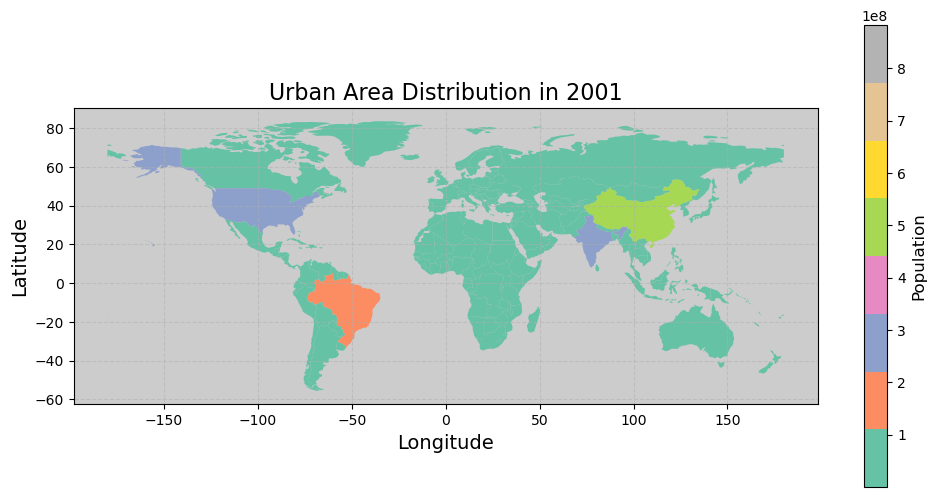

In [98]:
# Plotting choropleth map for the distribution of urban areas in the year 2001.

plot_population(gdf_total, '2001_urban', 'Urban Area Distribution in 2001', vmin=global_vmin, vmax=global_vmax)

<p> The sea-green color represents regions with a population of approximately 0.1 billion, encompassing all African countries and Russia. Notably, China stands out with a population of around 0.5 billion, followed by India and the USA, each with populations around 0.3 billion. <p>

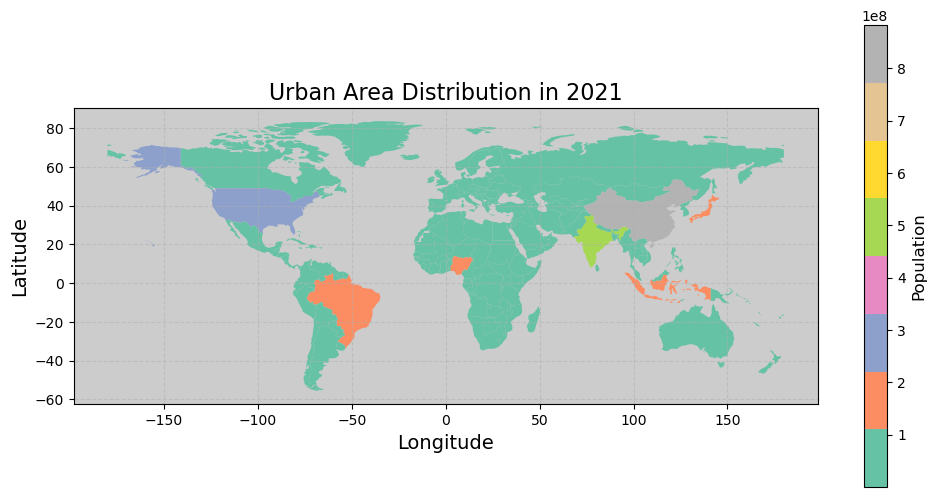

In [15]:
# Plotting choropleth map for the distribution of urban areas in the year 2021.

plot_population(gdf_total, '2021_urban', 'Urban Area Distribution in 2021', vmin=global_vmin, vmax=global_vmax)

<p> The sea-green color represents regions with a urban population of approximately 0.1 billion, covering almost all African countries and Russia. Notably, China has the highest population, estimated at around 0.8 billion, followed by India with 0.5 billion and the USA with 0.3 billion. Comparing with the year 2001, China experienced the most significant population increase, rising from 0.5 billion to 0.8 billion, while India's urban population reached 0.5 billion. The USA's urban population remained unchanged between 2001 and 2021. To the right of the gray color representing China, Japan is depicted in orange, indicating a population increase, while Indonesia is situated below China has the same population like Japan. <p>

## Task 1.2: Analysis of geospatial datasets

### Task 1.2.1 Choropleth Mapping of Urban Population in 2020 where total population is less than or equal to 67326569

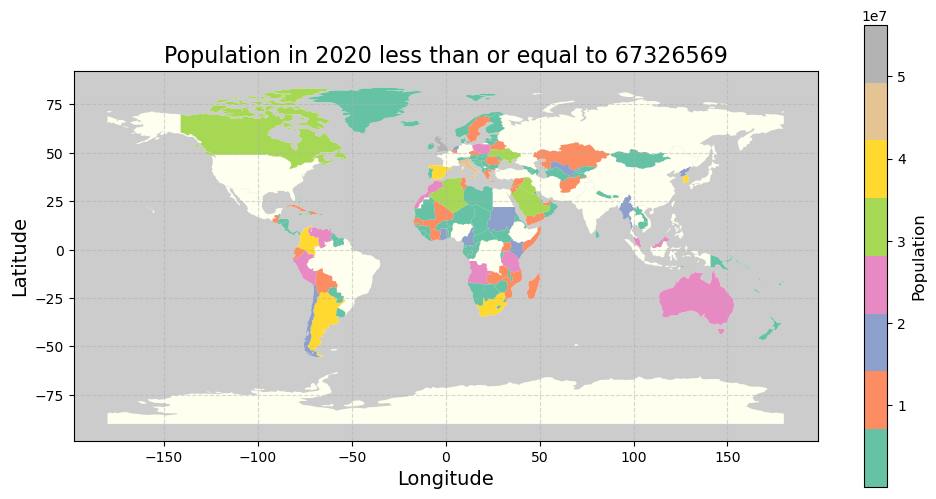

In [16]:
gdf_total_1_2_1 = gdf_total[gdf_total['2020_total_population'] <= 67326569]
plot_population(gdf_total_1_2_1, '2020_urban', 'Population in 2020 less than or equal to 67326569', background=True)

<h6> I wrote cordinates in (Longitude, Latitude) notation</h6>
<p> After applying the filter on the total population, we obtained the following results: Greenland (-50, 75) has the lowest urban population, with less than 10 million people. Similarly, Mongolia (100, 50) and Papua New Guinea (140, -10) exhibit similarly low urban populations. Additionally, some African countries fall within this filter. The pink shade represents Australia (130, -25), indicating a urban population of around 25 million. Conversely, the United Kingdom (-10, 65) has the highest urban population after applying the filter, estimated at around 70 million. <p>

### Task 1.2.2 Choropleth Mapping of Urban Population in 2020 greater than or equal to 331000000

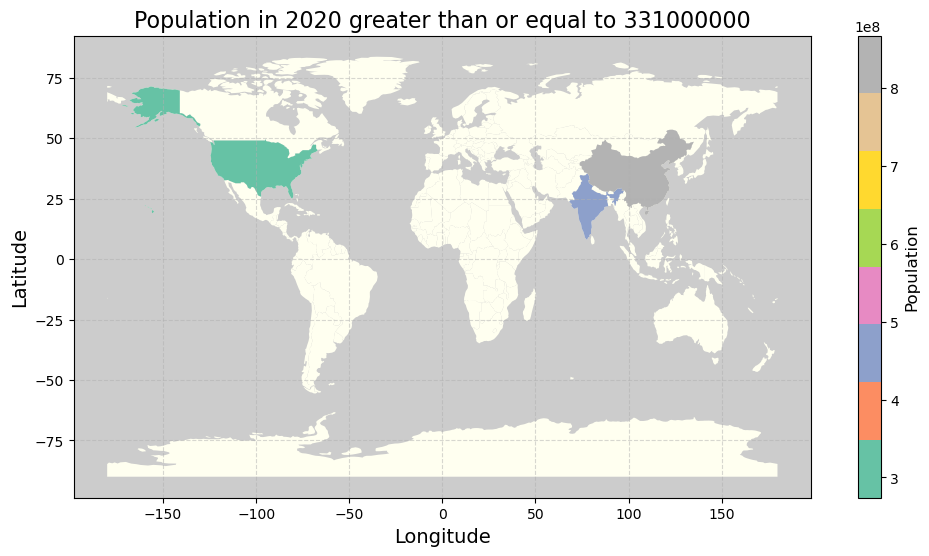

In [17]:
gdf_total_1_2_2 = gdf_total[gdf_total['2020_total_population'] >= 331000000]
plot_population(gdf_total_1_2_2, '2020_urban', 'Population in 2020 greater than or equal to 331000000', background=True)

<p> The  countries meeting this threshold include China, with the highest urban population of approximately 0.8 billion, represented by a dark grey color. India follows closely with a population of 0.45 billion, indicated by a bluish shade. The USA has the lowest population among the filtered countries, standing at 0.3 billion, depicted in sea green.​ <p>

### Task 1.2.3 Choropleth Mapping of Urban Population in 2020 between 10260000 and 1393400000

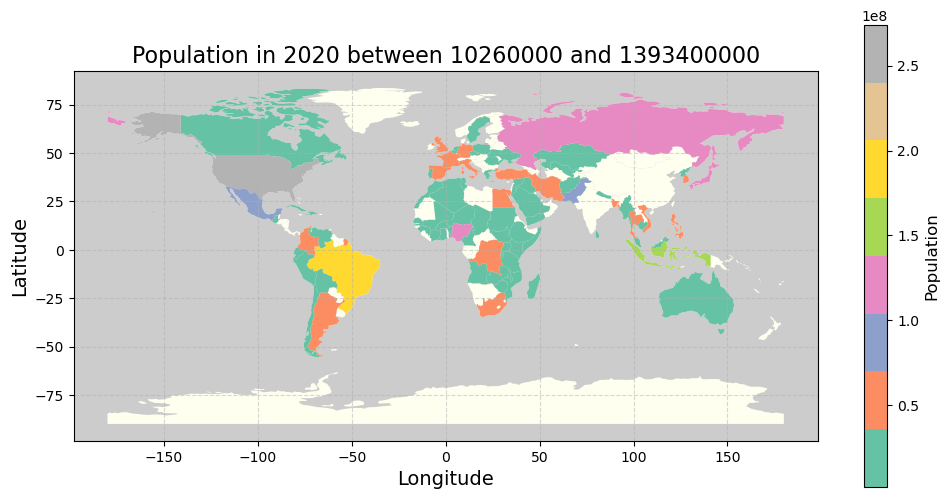

In [18]:
gdf_total_1_2_3 = gdf_total[(gdf_total['2020_total_population'] >= 10260000) & (gdf_total['2020_total_population'] <= 1393400000)]
plot_population(gdf_total_1_2_3, '2020_urban', 'Population in 2020 between 10260000 and 1393400000', True)

<p> The most contrasting feature after applying the filter is the USA, displaying the highest population in grey color, with an urban population of 0.25 billion. In contrast, Canada stands at less than 0.05 billion, similar to Australia and most African countries. Russia falls in the middle with a population around 0.25 billion. Brazil, represented by the yellow shade, has a population of approximately 0.2 billion. <p> 

### Task 1.2.4 percentage change in Highest Population Country from 2001 to 2021

In [44]:
highest_population_country = gdf_total.loc[gdf_total['2020_total_population'].idxmax()]
urban_population = highest_population_country.loc['2000_urban':'2021_urban']
urban_population.head()

2000_urban    452999147.0
2001_urban    471767321.0
2002_urban    491993700.0
2003_urban    512473984.0
2004_urban    533257098.0
Name: 139, dtype: object

In [45]:
pop_percentage_change = urban_population.pct_change()
pop_percentage_change *= 100
pop_percentage_change.drop(index=['2000_urban'], inplace=True)
pop_percentage_change.head()

2001_urban    4.143093
2002_urban    4.287363
2003_urban    4.162713
2004_urban    4.055448
2005_urban    3.958826
Name: 139, dtype: float64

In [47]:
years = [index.replace('_urban', '') for index in pop_percentage_change.index]
pc_1_2_4 = pd.DataFrame({'Years': years, 'Values': pop_percentage_change.values})
pc_1_2_4.head()

Years    Values
0  2001  4.143093
1  2002  4.287363
2  2003  4.162713
3  2004  4.055448
4  2005  3.958826

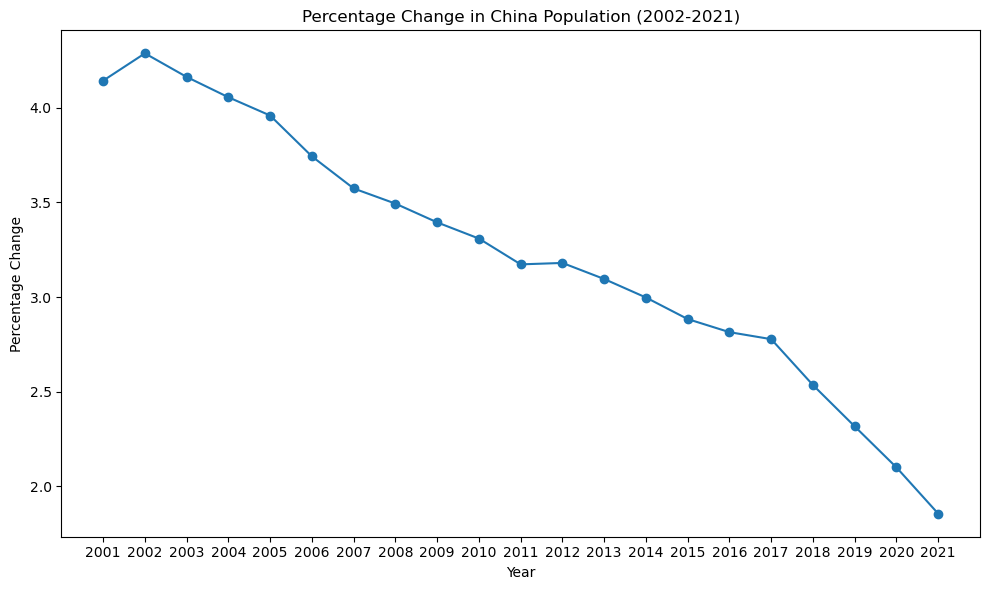

In [48]:
years = list(pc_1_2_4['Years'])  # Use the index of pop_percentage_change directly

plt.figure(figsize=(10, 6))
plt.plot(years, pc_1_2_4['Values'], marker='o')
plt.title('Percentage Change in China Population (2002-2021)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(years)
plt.tight_layout()
plt.show()

<p> The line graph shows a decreasing trend in the percentage change of China's population over the years. It starts at around 4.0% in 2002 and gradually decreases to just above 1.8% by 2021. The only anomalies occur in 2002 and 2012, where the population shows an increasing trend. From 2017, it shows a steeper decreasing trend. <p>

### Task 1.2.5 scatter plot between the mean population of each country and the mean urban population from the year 2001 until 2021

In [49]:
df_selected_pop_years = gdf_total.loc[:, ['Country Code_urban'] + [str(year)+"_urban" for year in range(2001, 2022)]]
gdf_urban_1_2_5 = df_selected_pop_years.set_index(['Country Code_urban'])
gdf_urban_1_2_5.head()

2001_urban   2002_urban   2003_urban   2004_urban  \
Country Code_urban                                                       
FJI                    406358.0     413829.0     421300.0     428832.0   
TZA                   8029877.0    8377308.0    8814911.0    9292156.0   
CAN                  24757782.0   25052940.0   25304780.0   25566897.0   
USA                 225792302.0  228400290.0  230876596.0  233532722.0   
KAZ                   8346075.0    8357267.0    8396312.0    8465822.0   

                     2005_urban   2006_urban   2007_urban   2008_urban  \
Country Code_urban                                                       
FJI                    436333.0     443873.0     451176.0     458642.0   
TZA                   9798745.0   10334400.0   10896766.0   11479108.0   
CAN                  25834340.0   26126316.0   26441461.0   26789863.0   
USA                 236200507.0  238999326.0  241795278.0  244607104.0   
KAZ                   8552467.0    8654579.0    8765446.0    8942684.0   

                     2009_urban   2010_urban  ...   2012_urban   2013_urban  \
Country Code_urban                            ...                             
FJI                    465636.0     472236.0  ...     484647.0     490579.0   
TZA                  12061617.0   12682374.0  ...   14093565.0   14872630.0   
CAN                  27158023.0   27522537.0  ...   28166078.0   28479640.0   
USA                 247276259.0  249849720.0  ...  254614421.0  256953576.0   
KAZ                   9133481.0    9275230.0  ...    9566957.0    9718100.0   

                     2014_urban   2015_urban   2016_urban   2017_urban  \
Country Code_urban                                                       
FJI                    496380.0     501947.0     507262.0     512280.0   
TZA                  15703729.0   16612464.0   17589735.0   18597942.0   
CAN                  28781576.0   29011826.0   29357013.0   29729549.0   
USA                 259430732.0  261950744.0  264473000.0  266788716.0   
KAZ                   9874723.0   10032906.0   10189588.0   10342139.0   

                     2018_urban   2019_urban   2020_urban   2021_urban  
Country Code_urban                                                      
FJI                    516917.0     521229.0     526914.0     533870.0  
TZA                  19620628.0   20656040.0   21736651.0   22862550.0  
CAN                  30175056.0   30638234.0   30999405.0   31213082.0  
USA                 268844029.0  270737596.0  274040676.0  275164510.0  
KAZ                  10495801.0   10652767.0   10816580.0   10986561.0  

[5 rows x 21 columns]

In [50]:
gdf_urban_1_2_5_mean = gdf_urban_1_2_5.mean(axis=1)
gdf_urban_1_2_5_mean = gdf_urban_1_2_5_mean.reset_index()
gdf_urban_1_2_5_mean.head()

Country Code_urban             0
0                FJI  4.747042e+05
1                TZA  1.416572e+07
2                CAN  2.785496e+07
3                USA  2.515493e+08
4                KAZ  9.475549e+06

In [51]:
df_selected_pop_years = gdf_total.loc[:, ['Country Code_total_population'] + [str(year)+"_total_population" for year in range(2001, 2022)]]
df_selected_pop_years = df_selected_pop_years.set_index(['Country Code_total_population'])
df_selected_pop_years.head()

2001_total_population  2002_total_population  \
Country Code_total_population                                                 
FJI                                         841320.0               849891.0   
TZA                                       35414469.0             36353531.0   
CAN                                       31020902.0             31360079.0   
USA                                      284968955.0            287625193.0   
KAZ                                       14858335.0             14858948.0   

                               2003_total_population  2004_total_population  \
Country Code_total_population                                                 
FJI                                         858306.0               866694.0   
TZA                                       37333918.0             38360879.0   
CAN                                       31644028.0             31940655.0   
USA                                      290107933.0            292805298.0   
KAZ                                       14909019.0             15012984.0   

                               2005_total_population  2006_total_population  \
Country Code_total_population                                                 
FJI                                         874923.0               883083.0   
TZA                                       39439505.0             40562052.0   
CAN                                       32243753.0             32571174.0   
USA                                      295516599.0            298379912.0   
KAZ                                       15147029.0             15308085.0   

                               2007_total_population  2008_total_population  \
Country Code_total_population                                                 
FJI                                         890648.0               896731.0   
TZA                                       41716497.0             42870884.0   
CAN                                       32889025.0             33247118.0   
USA                                      301231207.0            304093966.0   
KAZ                                       15484192.0             15776938.0   

                               2009_total_population  2010_total_population  \
Country Code_total_population                                                 
FJI                                         901383.0               905169.0   
TZA                                       43957933.0             45110527.0   
CAN                                       33628895.0             34004889.0   
USA                                      306771529.0            309327143.0   
KAZ                                       16092822.0             16321872.0   

                               ...  2012_total_population  \
Country Code_total_population  ...                          
FJI                            ...               911059.0   
TZA                            ...             47786137.0   
CAN                            ...             34714222.0   
USA                            ...            313877662.0   
KAZ                            ...             16792090.0   

                               2013_total_population  2014_total_population  \
Country Code_total_population                                                 
FJI                                         913453.0               915560.0   
TZA                                       49253643.0             50814552.0   
CAN                                       35082954.0             35437435.0   
USA                                      316059947.0            318386329.0   
KAZ                                       17035551.0             17288285.0   

                               2015_total_population  2016_total_population  \
Country Code_total_population                                                 
FJI                                         917200.0               918371.0   
TZA                                       

In [52]:
gdf_pop_1_2_5_mean = df_selected_pop_years.mean(axis=1)
gdf_pop_1_2_5_mean = gdf_pop_1_2_5_mean.reset_index()
gdf_pop_1_2_5_mean.head()

Country Code_total_population             0
0                           FJI  8.977932e+05
1                           TZA  4.770753e+07
2                           CAN  3.444677e+07
3                           USA  3.103990e+08
4                           KAZ  1.663642e+07

C:\Users\Asad Naseer\AppData\Local\Temp\ipykernel_7120\807748049.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax1.scatter(gdf_pop_1_2_5_mean[0], gdf_urban_1_2_5_mean[0], cmap='tab20', alpha=0.5)
C:\Users\Asad Naseer\AppData\Local\Temp\ipykernel_7120\807748049.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax2.scatter(gdf_pop_1_2_5_mean[0], gdf_urban_1_2_5_mean[0], cmap='tab20', alpha=0.5)


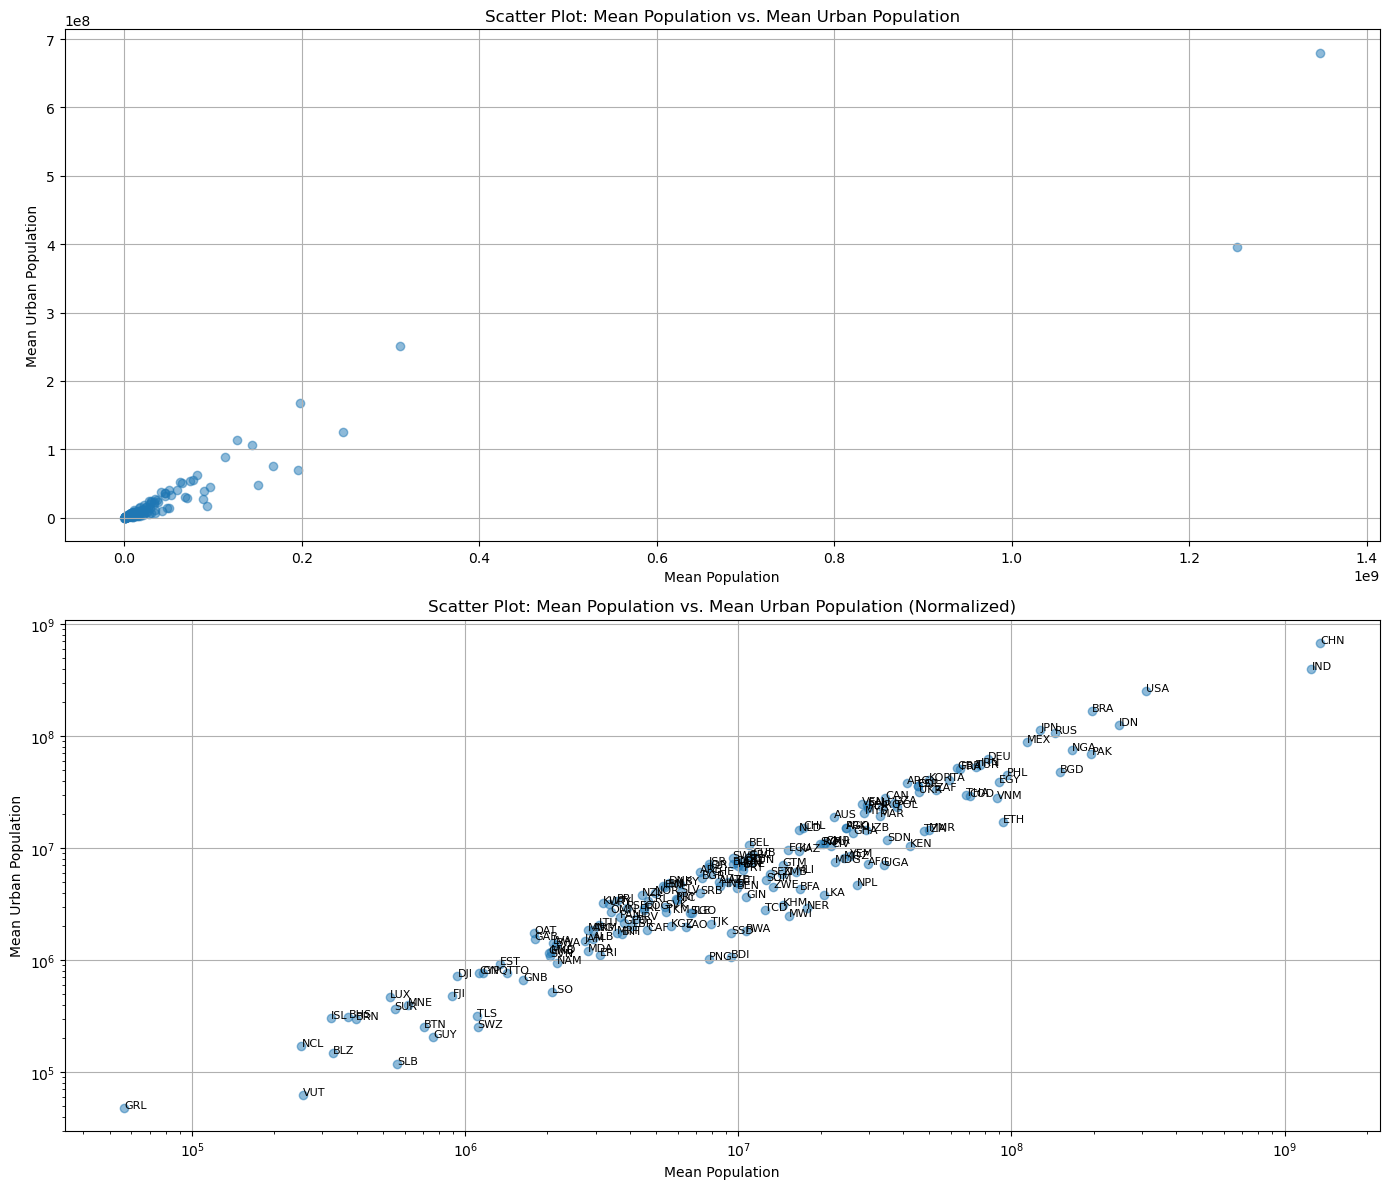

<Figure size 640x480 with 0 Axes>

In [53]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plotting scatter plot with country codes as colors on the first axis
scatter1 = ax1.scatter(gdf_pop_1_2_5_mean[0], gdf_urban_1_2_5_mean[0], cmap='tab20', alpha=0.5)

# Adding color bar legend on the first axis
# fig.colorbar(scatter1, ax=ax1, label='Country Code')
ax1.set_title('Scatter Plot: Mean Population vs. Mean Urban Population')
ax1.set_xlabel('Mean Population')
ax1.set_ylabel('Mean Urban Population')
ax1.grid(True)


# Adding annotations for country names on the first axis
for i, txt in enumerate(gdf_pop_1_2_5_mean['Country Code_total_population']):
    ax2.annotate(txt, (gdf_pop_1_2_5_mean[0][i], gdf_urban_1_2_5_mean[0][i]), fontsize=8)

# Plotting scatter plot with categorical country codes as colors on the second axis
scatter2 = ax2.scatter(gdf_pop_1_2_5_mean[0], gdf_urban_1_2_5_mean[0], cmap='tab20', alpha=0.5)

# Setting title and labels for the second axis
ax2.set_title('Scatter Plot: Mean Population vs. Mean Urban Population (Normalized)')
ax2.set_xlabel('Mean Population')
ax2.set_ylabel('Mean Urban Population')
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()
ax2.grid(True)

plt.tight_layout()
plt.show()


<p> Both plots illustrate that there is a positive correlation between the mean population and the mean urban population. The normalized plot particularly highlights that as countries grow in population, their urban populations tend to increase exponentially. This could reflect urbanization trends where larger populations are increasingly concentrated in urban areas.<p>

# TASK 2: Geospatial Sentiment Analysis Using Social Media Data

In [2]:
import re
from nltk.corpus import stopwords
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from textblob import TextBlob
from matplotlib.colors import ListedColormap
import plotly.express as px

In [30]:
# Read the tweets data

df_tweets = pd.read_csv("tweets.csv")
df_tweets.head()

Unnamed: 0                                             tweets  \
0           0  ChatGPT: Optimizing Language Models for Dialog...   
1           1  Try talking with ChatGPT, our new AI system wh...   
2           2  ChatGPT: Optimizing Language Models for Dialog...   
3           3  THRILLED to share that ChatGPT, our new model ...   
4           4  As of 2 minutes ago, @OpenAI released their ne...   

              user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description      user_created  \
0  Aggregator of Asian American news; scanning di...  08/04/2009 17:52   
1  Marketing dude, tech geek, heavy metal & '80s ...  21/09/2009 15:27   
2                                     heil, hydra 🖐☺  25/06/2020 23:30   
3  Hosting "CharlesAdlerTonight" Global News Radi...  10/09/2008 11:28   
4  Citizen News Channel bringing you an alternati...  23/04/2020 17:58   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

               date               source  retweets  favorites  is_retweet  
0  20/12/2020 06:06  Twitter for Android         0          0       False  
1  13/12/2020 16:27      Twitter Web App         1          1       False  
2  12/12/2020 20:33  Twitter for Android         0          0       False  
3  12/12/2020 20:23      Twitter Web App       446       2129       False  
4  12/12/2020 20:17   Twitter for iPhone         0          0       False

In [31]:
df_tweets.shape

(11020, 15)

## Task 2.1: Data Pre-processing

In [32]:
# Drop the rows where user location and tweets are empty

df_tweets_cleaned = df_tweets.dropna(subset=['user_location', 'tweets'])
df_tweets_cleaned.shape

(8750, 15)

In [33]:
# Randomly sample 700 rows from the cleaned DataFrame
# Ensuring reproducibility by setting the random seed to 1

selected_df = df_tweets_cleaned.sample(n=700, random_state=1)
selected_df.shape

(700, 15)

In [34]:
def clean_tweet(tweet):
    """
    Clean the input tweet by removing URLs, hashtags, and stopwords.

    Parameters:
    - tweet (str): The input tweet to be cleaned.

    Returns:
    - str: The cleaned tweet with URLs, hashtags, and stopwords removed.
    """
    # Remove URLs from the tweet
    tweet = re.sub(r'https\S+', '', tweet)
    
    # Remove non-alphabetic characters (including hashtags)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Remove stopwords from the tweet
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in stopwords.words('english'))
    
    # Strip leading and trailing whitespaces
    return tweet.strip()

In [35]:
selected_df['cleaned_tweets'] = selected_df['tweets'].apply(clean_tweet)
selected_df.head()

Unnamed: 0                                             tweets  \
8532        8532  OpenAI ChatGPT knows how to stop students chea...   
3323        3323  There’s no doubt in my mind that almost all co...   
1760        1760  awesome...just asked #openai #chatgpt a few si...   
9488        9488  Whoa it’s super success\n\n#ChatGPT https://t....   
1667        1667  holyyyy, solved my computer networks assignmen...   

             user_name     user_location  \
8532  Hinako Sakuraoka  Hamburg, Germany   
3323              Alen   California, USA   
1760     Rory Reynolds   Dubai/Abu Dhabi   
9488             Nevil  Toronto, Ontario   
1667      The National    Abu Dhabi, UAE   

                                       user_description      user_created  \
8532  1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...  27/04/2011 13:52   
3323   no such ting in a life that’s better than yours.  19/04/2017 21:45   
1760  National News Editor at @TheNationalNews. Duba...  18/03/2009 13:11   
9488                             infosec | Proud Indian  24/03/2020 05:29   
1667  The official Twitter feed of The National, the...  11/02/2009 11:34   

      user_followers  user_friends  user_favourites  user_verified  \
8532              74           249              345          False   
3323              14           209              393          False   
1760            2325          2587              173          False   
9488               6            16                1          False   
1667         1033382           195             3226           True   

                  date                source  retweets  favorites  is_retweet  \
8532  27/05/2021 12:36                 IFTTT         0          3       False   
3323  14/01/2021 08:19    Twitter for iPhone         0          0       False   
1760  29/12/2020 11:11       Twitter Web App         1          3       False   
9488  01/08/2021 15:25    Twitter for iPhone         0          1       False   
1667  28/12/2020 20:15  Twitter Media Studio         1         11       False   

                                         cleaned_tweets  
8532  OpenAI ChatGPT knows stop students cheating us...  
3323  Theres doubt mind almost corporate jobs using ...  
1760  awesomejust asked openai chatgpt simple develo...  
9488                        Whoa super successnnChatGPT  
1667  holyyyy solved computer networks assignment us...

## Task 2.2: Geocoding

In [36]:
# Initialize a geolocator object with a user-agent string for geocoding
geolocator = Nominatim(user_agent="CIS7030")

# Apply rate limiting to the geocoding function with a minimum delay of 1 second
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [37]:
# Use geocoding to obtain latitude and longitude coordinates from user locations
# Apply RateLimiter to avoid overloading the geocoding service
selected_df['location'] = selected_df['user_location'].apply(geocode)

# Extract latitude from the location object, set to None if location is not found
selected_df['Lat'] = selected_df['location'].apply(lambda x: x.latitude if x else None)

# Extract longitude from the location object, set to None if location is not found
selected_df['Lon'] = selected_df['location'].apply(lambda x: x.longitude if x else None)

# Display the updated DataFrame with latitude and longitude columns
selected_df.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*(' ',), **{}).
Traceback (most recent call last):
  File "C:\Users\Asad Naseer\.conda\envs\sma_env\lib\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "C:\Users\Asad Naseer\.conda\envs\sma_env\lib\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "C:\Users\Asad Naseer\.conda\envs\sma_env\lib\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 400

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Asad Naseer\.conda\envs\sma_env\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "C:\Users\Asad Naseer\.conda\envs\sma_env\l

Unnamed: 0                                             tweets  \
8532        8532  OpenAI ChatGPT knows how to stop students chea...   
3323        3323  There’s no doubt in my mind that almost all co...   
1760        1760  awesome...just asked #openai #chatgpt a few si...   
9488        9488  Whoa it’s super success\n\n#ChatGPT https://t....   
1667        1667  holyyyy, solved my computer networks assignmen...   

             user_name     user_location  \
8532  Hinako Sakuraoka  Hamburg, Germany   
3323              Alen   California, USA   
1760     Rory Reynolds   Dubai/Abu Dhabi   
9488             Nevil  Toronto, Ontario   
1667      The National    Abu Dhabi, UAE   

                                       user_description      user_created  \
8532  1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...  27/04/2011 13:52   
3323   no such ting in a life that’s better than yours.  19/04/2017 21:45   
1760  National News Editor at @TheNationalNews. Duba...  18/03/2009 13:11   
9488                             infosec | Proud Indian  24/03/2020 05:29   
1667  The official Twitter feed of The National, the...  11/02/2009 11:34   

      user_followers  user_friends  user_favourites  user_verified  \
8532              74           249              345          False   
3323              14           209              393          False   
1760            2325          2587              173          False   
9488               6            16                1          False   
1667         1033382           195             3226           True   

                  date                source  retweets  favorites  is_retweet  \
8532  27/05/2021 12:36                 IFTTT         0          3       False   
3323  14/01/2021 08:19    Twitter for iPhone         0          0       False   
1760  29/12/2020 11:11       Twitter Web App         1          3       False   
9488  01/08/2021 15:25    Twitter for iPhone         0          1       False   
1667  28/12/2020 20:15  Twitter Media Studio         1         11       False   

                                         cleaned_tweets  \
8532  OpenAI ChatGPT knows stop students cheating us...   
3323  Theres doubt mind almost corporate jobs using ...   
1760  awesomejust asked openai chatgpt simple develo...   
9488                        Whoa super successnnChatGPT   
1667  holyyyy solved computer networks assignment us...   

                                               location        Lat         Lon  
8532     (Hamburg, Deutschland, (53.550341, 10.000654))  53.550341   10.000654  
3323  (California, United States, (36.7014631, -118....  36.701463 -118.755997  
1760  (First Abu Dhabi Bank, طريق أبو بكر الصديق, ال...  25.264478   55.330392  
9488  (Toronto, Golden Horseshoe, Ontario, Canada, (...  43.653482  -79.383935  
1667  (أبو ظبي, الإمارات العربية المتحدة, (24.453835...  24.453835   54.377401

In [38]:
selected_df.shape

(700, 19)

In [40]:
selected_df_cleaned = selected_df.dropna(subset=['location'])
selected_df_cleaned.shape

(615, 19)

In [41]:
# Function to extract country from location
def get_country(location):
    try:
        # Using geopy to get location info
        location_info = geolocator.geocode(location, language='en')
        # Extracting country from location info
        country = location_info.raw['display_name'].split(', ')[-1]
        return country
    except:
        return None

C:\Users\Asad Naseer\AppData\Local\Temp\ipykernel_7120\3845918898.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df_cleaned['country'] = selected_df_cleaned['location'].apply(get_country)


In [54]:
selected_df_cleaned['country'] = selected_df_cleaned['location'].apply(get_country)
selected_df_cleaned.head()

Unnamed: 0                                             tweets  \
8532        8532  OpenAI ChatGPT knows how to stop students chea...   
3323        3323  There’s no doubt in my mind that almost all co...   
1760        1760  awesome...just asked #openai #chatgpt a few si...   
9488        9488  Whoa it’s super success\n\n#ChatGPT https://t....   
1667        1667  holyyyy, solved my computer networks assignmen...   

             user_name     user_location  \
8532  Hinako Sakuraoka  Hamburg, Germany   
3323              Alen   California, USA   
1760     Rory Reynolds   Dubai/Abu Dhabi   
9488             Nevil  Toronto, Ontario   
1667      The National    Abu Dhabi, UAE   

                                       user_description      user_created  \
8532  1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...  27/04/2011 13:52   
3323   no such ting in a life that’s better than yours.  19/04/2017 21:45   
1760  National News Editor at @TheNationalNews. Duba...  18/03/2009 13:11   
9488                             infosec | Proud Indian  24/03/2020 05:29   
1667  The official Twitter feed of The National, the...  11/02/2009 11:34   

      user_followers  user_friends  user_favourites  user_verified  \
8532              74           249              345          False   
3323              14           209              393          False   
1760            2325          2587              173          False   
9488               6            16                1          False   
1667         1033382           195             3226           True   

                  date                source  retweets  favorites  is_retweet  \
8532  27/05/2021 12:36                 IFTTT         0          3       False   
3323  14/01/2021 08:19    Twitter for iPhone         0          0       False   
1760  29/12/2020 11:11       Twitter Web App         1          3       False   
9488  01/08/2021 15:25    Twitter for iPhone         0          1       False   
1667  28/12/2020 20:15  Twitter Media Studio         1         11       False   

                                         cleaned_tweets  \
8532  OpenAI ChatGPT knows stop students cheating us...   
3323  Theres doubt mind almost corporate jobs using ...   
1760  awesomejust asked openai chatgpt simple develo...   
9488                        Whoa super successnnChatGPT   
1667  holyyyy solved computer networks assignment us...   

                                               location        Lat  \
8532     (Hamburg, Deutschland, (53.550341, 10.000654))  53.550341   
3323  (California, United States, (36.7014631, -118....  36.701463   
1760  (First Abu Dhabi Bank, طريق أبو بكر الصديق, ال...  25.264478   
9488  (Toronto, Golden Horseshoe, Ontario, Canada, (...  43.653482   
1667  (أبو ظبي, الإمارات العربية المتحدة, (24.453835...  24.453835   

             Lon               country  
8532   10.000654               Germany  
3323 -118.755997         United States  
1760   55.330392  United Arab Emirates  
9488  -79.383935                Canada  
1667   54.377401  United Arab Emirates

In [55]:
# Save the cleaned DataFrame with geocoding results to a tab-separated text file

selected_df_cleaned.to_csv('cleaned_geocode.txt', sep='\t', index=False)

In [3]:
# Read the saved cleaned DataFrame with geocoding results from a tab-separated text file

df_cleaned_geocode = pd.read_csv('cleaned_geocode.txt', sep='\t')
df_cleaned_geocode.head()

Unnamed: 0                                             tweets  \
0        8532  OpenAI ChatGPT knows how to stop students chea...   
1        3323  There’s no doubt in my mind that almost all co...   
2        1760  awesome...just asked #openai #chatgpt a few si...   
3        9488  Whoa it’s super success\n\n#ChatGPT https://t....   
4        1667  holyyyy, solved my computer networks assignmen...   

          user_name     user_location  \
0  Hinako Sakuraoka  Hamburg, Germany   
1              Alen   California, USA   
2     Rory Reynolds   Dubai/Abu Dhabi   
3             Nevil  Toronto, Ontario   
4      The National    Abu Dhabi, UAE   

                                    user_description      user_created  \
0  1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...  27/04/2011 13:52   
1   no such ting in a life that’s better than yours.  19/04/2017 21:45   
2  National News Editor at @TheNationalNews. Duba...  18/03/2009 13:11   
3                             infosec | Proud Indian  24/03/2020 05:29   
4  The official Twitter feed of The National, the...  11/02/2009 11:34   

   user_followers  user_friends  user_favourites  user_verified  \
0              74           249              345          False   
1              14           209              393          False   
2            2325          2587              173          False   
3               6            16                1          False   
4         1033382           195             3226           True   

               date                source  retweets  favorites  is_retweet  \
0  27/05/2021 12:36                 IFTTT         0          3       False   
1  14/01/2021 08:19    Twitter for iPhone         0          0       False   
2  29/12/2020 11:11       Twitter Web App         1          3       False   
3  01/08/2021 15:25    Twitter for iPhone         0          1       False   
4  28/12/2020 20:15  Twitter Media Studio         1         11       False   

                                      cleaned_tweets  \
0  OpenAI ChatGPT knows stop students cheating us...   
1  Theres doubt mind almost corporate jobs using ...   
2  awesomejust asked openai chatgpt simple develo...   
3                        Whoa super successnnChatGPT   
4  holyyyy solved computer networks assignment us...   

                                            location        Lat         Lon  \
0                               Hamburg, Deutschland  53.550341   10.000654   
1                          California, United States  36.701463 -118.755997   
2  First Abu Dhabi Bank, طريق أبو بكر الصديق, الخ...  25.264478   55.330392   
3         Toronto, Golden Horseshoe, Ontario, Canada  43.653482  -79.383935   
4                  أبو ظبي, الإمارات العربية المتحدة  24.453835   54.377401   

                country  
0               Germany  
1         United States  
2  United Arab Emirates  
3                Canada  
4  United Arab Emirates

In [4]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ['Unnamed: 0', 'user_location', 'tweets', 'user_description'] 
df_cleaned_geocode.drop(columns=columns_to_drop, inplace=True)
df_cleaned_geocode.head()

user_name      user_created  user_followers  user_friends  \
0  Hinako Sakuraoka  27/04/2011 13:52              74           249   
1              Alen  19/04/2017 21:45              14           209   
2     Rory Reynolds  18/03/2009 13:11            2325          2587   
3             Nevil  24/03/2020 05:29               6            16   
4      The National  11/02/2009 11:34         1033382           195   

   user_favourites  user_verified              date                source  \
0              345          False  27/05/2021 12:36                 IFTTT   
1              393          False  14/01/2021 08:19    Twitter for iPhone   
2              173          False  29/12/2020 11:11       Twitter Web App   
3                1          False  01/08/2021 15:25    Twitter for iPhone   
4             3226           True  28/12/2020 20:15  Twitter Media Studio   

   retweets  favorites  is_retweet  \
0         0          3       False   
1         0          0       False   
2         1          3       False   
3         0          1       False   
4         1         11       False   

                                      cleaned_tweets  \
0  OpenAI ChatGPT knows stop students cheating us...   
1  Theres doubt mind almost corporate jobs using ...   
2  awesomejust asked openai chatgpt simple develo...   
3                        Whoa super successnnChatGPT   
4  holyyyy solved computer networks assignment us...   

                                            location        Lat         Lon  \
0                               Hamburg, Deutschland  53.550341   10.000654   
1                          California, United States  36.701463 -118.755997   
2  First Abu Dhabi Bank, طريق أبو بكر الصديق, الخ...  25.264478   55.330392   
3         Toronto, Golden Horseshoe, Ontario, Canada  43.653482  -79.383935   
4                  أبو ظبي, الإمارات العربية المتحدة  24.453835   54.377401   

                country  
0               Germany  
1         United States  
2  United Arab Emirates  
3                Canada  
4  United Arab Emirates

In [5]:
# Randomly sample 500 rows from the cleaned geocode DataFrame
# Ensuring reproducibility by setting the random seed to 1

df_cleaned_sample = df_cleaned_geocode.sample(n=500, random_state=1)
df_cleaned_sample.shape

(500, 16)

## Functions for task 2.3 and 2.4

In [6]:
def plot_sentiments_hist(dataframe, column, x_label, title):
    """
    Plot a histogram of sentiment polarity or subjectivity values.

    Parameters:
    - dataframe (DataFrame): Input DataFrame containing the sentiment data.
    - column (str): Name of the column in the DataFrame containing the sentiment values.
    - x_label (str): Label for the x-axis.
    - title (str): Title of the histogram plot.

    Returns:
    - None (plots the histogram directly using matplotlib).
    """
    # Plot histogram with specified color and edge color
    plt.hist(dataframe[column], bins=10, color='skyblue', edgecolor='black')

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)

In [7]:
df_cleaned_sample.country.unique

<bound method Series.unique of 475             Philippines
473          United Kingdom
111                  Canada
318                 Germany
13           United Kingdom
               ...         
485                   India
278                  Canada
432                   India
118    United Arab Emirates
20                  Belgium
Name: country, Length: 500, dtype: object>

In [8]:
def world_map_plot(data, column_name, title_name, scope_projection=None, scope_value=None, sentiment_type = None):
    """
    Generate a world map plot using Plotly Express.

    Parameters:
    - data: DataFrame, the data to be plotted
    - column_name: str, the column in the DataFrame to be used for coloring the plot
    - title_name: str, the title of the plot
    - scope_projection: str, optional, the projection type for the map (default is 'natural earth')
    - scope_value: str, optional, the scope of the map (default is 'world')

    Returns:
    - None
    """
    # Define custom colors for each category
    if sentiment_type == "subjectivity":
        color_map = {
        'Subjective': 'darkgreen',
        'Objective': 'red',
        'Neutral': 'yellow'
    } 
    else:
        color_map = {
            'Positive': 'darkgreen',
            'Negative': 'red',
            'Neutral': 'yellow'
        }
    
    # Filter data if scope_value is 'usa'
    if scope_value == "usa":
        data = data[data['country'] == 'United States']
    
    # Set default values for scope_projection and scope_value if not provided
    if not scope_projection:
        scope_projection = 'natural earth'
        
    if not scope_value:
        scope_value = 'world'
    
    # Create a scatter plot using plotly express
    fig = px.scatter_geo(data, 
                         lat=data.geometry.y, 
                         lon=data.geometry.x, 
                         color=column_name,
                         color_discrete_map=color_map,  # Use custom colors
                         hover_name=data.location,
                         projection=scope_projection,
                         scope=scope_value,
                         labels={column_name: title_name})  # Label for the legend
    
    # Update layout with title and geo_scope
    fig.update_layout(
        title=title_name,
        geo_scope=scope_value,
    )
    # Show the plot
    fig.show()

In [9]:
def plot_sentiment_count(dataframe, column, xlabel, title):
    """
    Plot a bar plot showing the count of sentiment polarity categories.

    Parameters:
    - dataframe (DataFrame): Input DataFrame containing sentiment polarity data.
    - column (str): Name of the column containing sentiment polarity categories.
    - xlabel (str): Label for the x-axis.
    - title (str): Title of the plot.

    Returns:
    - None (plots the graph using matplotlib).
    """
    counts = dataframe[column].value_counts()
    sentiment_counts = dataframe.groupby([column, column]).size().unstack(fill_value=0)
    sentiment_counts.plot(kind='bar', stacked=True)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(title)
    plt.legend(title=title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Task 2.3 Polarity analysis

In [10]:
def getTextPolarity(txt):
    """
    Calculate the polarity of a text using TextBlob.

    Parameters:
    - txt (str): The input text for which polarity needs to be calculated.

    Returns:
    - float or None: The polarity score of the text, or None if there's an error.
    """
    try:
        # Use TextBlob to calculate the polarity of the text
        polarity = TextBlob(txt).sentiment.polarity
    except Exception as e:
        # Print an error message if there's an issue processing the text
        print(f"Error processing text: {e}")
        # Set polarity to None if an error occurs
        polarity = None
    return polarity

In [25]:
# Apply the getTextPolarity function to each text in the 'cleaned_tweets' column of df_cleaned_sample
# and store the polarity scores in a new column named 'polarity'
df_cleaned_sample['polarity'] = df_cleaned_sample['cleaned_tweets'].apply(getTextPolarity)
df_cleaned_sample.head()

user_name      user_created  \
475                                      Chamar Ariban  17/03/2010 12:31   
473                                        Adam Wittek  22/03/2016 10:58   
111  Canadian Advocacy Centre 4 Health Safety & Jus...  10/09/2020 19:03   
318                           CHEManager International  14/01/2010 07:42   
13                                    Chemist+Druggist  10/02/2009 10:00   

     user_followers  user_friends  user_favourites  user_verified  \
475              86           345            13978          False   
473             292           251              844          False   
111             606          2050              735          False   
318            3548          1198              467          False   
13            19112          1790             7041           True   

                 date               source  retweets  favorites  is_retweet  \
475  28/08/2021 03:42   Twitter for iPhone         0          1       False   
473  16/05/2021 11:35  Twitter for Android         0          1       False   
111  11/01/2021 01:20      Twitter Web App         0          1       False   
318  22/02/2021 07:55            TweetDeck         0          0       False   
13   20/01/2021 15:27            TweetDeck         0          1       False   

                                        cleaned_tweets  \
475                      ChatGPT Oxford admission soon   
473  Ill stop sharing also asked ChatGPT write rap ...   
111                Im impressednnOpenAi ChatGPT OpenAI   
318  new post WeeknOpenAIs New ChatGPT Might First ...   
13   mind blowing thread read year tech space AI ro...   

                                              location        Lat         Lon  \
475  DLTBCo Pasay City Bus Depot, Zone 2, District ...  14.553831  120.993548   
473    London, Greater London, England, United Kingdom  51.489334   -0.144055   
111                                             Canada  61.066692 -107.991707   
318  Weinheim, Rhein-Neckar-Kreis, Baden-Württember...  49.546235    8.671746   
13     London, Greater London, England, United Kingdom  51.489334   -0.144055   

            country  polarity sentiment_polarity  
475     Philippines  0.000000            Neutral  
473  United Kingdom  0.100000            Neutral  
111          Canada  0.000000            Neutral  
318         Germany  0.305682           Positive  
13   United Kingdom  0.285714           Positive

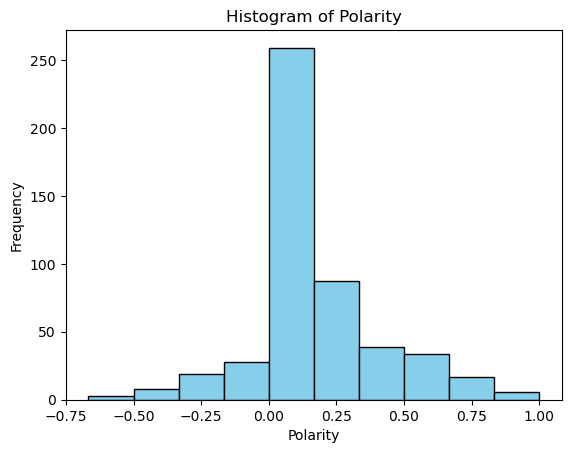

In [12]:
plot_sentiments_hist(df_cleaned_sample, 'polarity', 'Polarity', 'Histogram of Polarity')

Most of the polarity in our sample depicts a neutral behaviour

In [27]:
def classify_polarity(polarity):
    """
    Classifies polarity into three categories: Positive, Negative, or Neutral based on the given polarity value.

    Parameters:
    - polarity (float): The polarity value to classify.

    Returns:
    - str: The classification label ('Positive', 'Negative', or 'Neutral').
    """
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [28]:
# Apply the classify_polarity function to each polarity value in the DataFrame
# and create a new column 'sentiment_polarity' to store the classification result.

df_cleaned_sample['sentiment_polarity'] = df_cleaned_sample['polarity'].apply(classify_polarity)

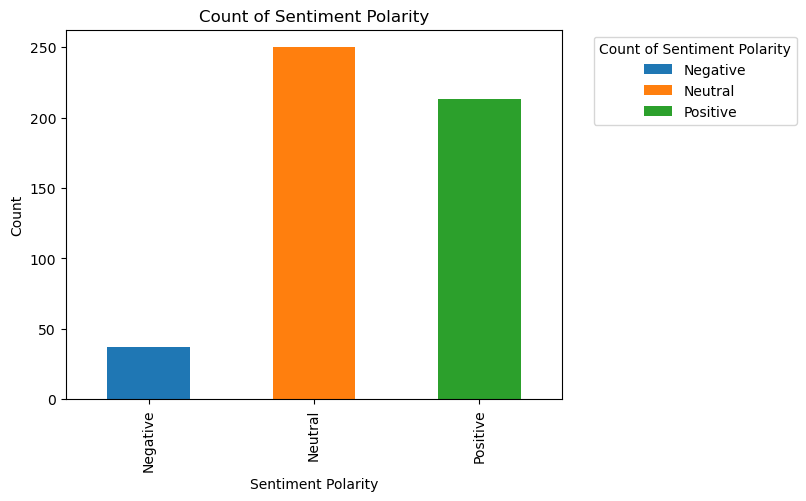

In [15]:
plot_sentiment_count(df_cleaned_sample, 'sentiment_polarity', 'Sentiment Polarity', 'Count of Sentiment Polarity')

In the dataset I've worked with, the occurrence of negative sentiment is significantly lower compared to neutral and positive sentiments. Interestingly, neutral sentiment prevails, indicating that people tend to express more neutral feelings toward using ChatGPT.

In [40]:
# Create a GeoDataFrame 'gdf_polarity' from the DataFrame 'df_cleaned_sample'
# using longitude and latitude information to generate geometries.
gdf_polarity = gpd.GeoDataFrame(
    df_cleaned_sample, 
    geometry=gpd.points_from_xy(df_cleaned_sample.Lon, df_cleaned_sample.Lat)
)

# Display the first few rows of the GeoDataFrame.
gdf_polarity.head()

user_name      user_created  \
475                                      Chamar Ariban  17/03/2010 12:31   
473                                        Adam Wittek  22/03/2016 10:58   
111  Canadian Advocacy Centre 4 Health Safety & Jus...  10/09/2020 19:03   
318                           CHEManager International  14/01/2010 07:42   
13                                    Chemist+Druggist  10/02/2009 10:00   

     user_followers  user_friends  user_favourites  user_verified  \
475              86           345            13978          False   
473             292           251              844          False   
111             606          2050              735          False   
318            3548          1198              467          False   
13            19112          1790             7041           True   

                 date               source  retweets  favorites  is_retweet  \
475  28/08/2021 03:42   Twitter for iPhone         0          1       False   
473  16/05/2021 11:35  Twitter for Android         0          1       False   
111  11/01/2021 01:20      Twitter Web App         0          1       False   
318  22/02/2021 07:55            TweetDeck         0          0       False   
13   20/01/2021 15:27            TweetDeck         0          1       False   

                                        cleaned_tweets  \
475                      ChatGPT Oxford admission soon   
473  Ill stop sharing also asked ChatGPT write rap ...   
111                Im impressednnOpenAi ChatGPT OpenAI   
318  new post WeeknOpenAIs New ChatGPT Might First ...   
13   mind blowing thread read year tech space AI ro...   

                                              location        Lat         Lon  \
475  DLTBCo Pasay City Bus Depot, Zone 2, District ...  14.553831  120.993548   
473    London, Greater London, England, United Kingdom  51.489334   -0.144055   
111                                             Canada  61.066692 -107.991707   
318  Weinheim, Rhein-Neckar-Kreis, Baden-Württember...  49.546235    8.671746   
13     London, Greater London, England, United Kingdom  51.489334   -0.144055   

            country  polarity sentiment_polarity                     geometry  
475     Philippines  0.000000            Neutral   POINT (120.99355 14.55383)  
473  United Kingdom  0.100000            Neutral    POINT (-0.14406 51.48933)  
111          Canada  0.000000            Neutral  POINT (-107.99171 61.06669)  
318         Germany  0.305682           Positive     POINT (8.67175 49.54623)  
13   United Kingdom  0.285714           Positive    POINT (-0.14406 51.48933)

In [17]:
world_map_plot(gdf_polarity, "sentiment_polarity", "Polarity Sentiments In World")

The map illustrates the global distribution of sentiment polarity, showcasing the prevalence of positive, negative, and neutral sentiments. Neutral sentiment dominates the visualization due to its highest occurrence. The majority of the dataset samples are concentrated in Europe and the US, with the remaining scattered across other regions worldwide.

In [18]:
world_map_plot(gdf_polarity, "sentiment_polarity", "Polarity Sentiments In Europe", "natural earth", "europe")

The map displays Europe, and I'll focus on two countries within it: the United Kingdom and Ireland.

<div style="display: flex; flex-direction: column; align-items: center;">
    <div style="flex: 1; border-right: 2px solid #000; height: 400px; padding: 20px; text-align: center; overflow-y: auto;">
        <h2>Polarity Map of UK</h2>
        <img src="images/uk_polarity.JPG" alt="Polarity Map of UK" style="width: 200px; height: auto; margin-bottom: 10px;" />
        <p style="text-align: justify; font-size: 16px; line-height: 1.6; color: #333;"> 
            The map illustrates minimal negative feedback regarding ChatGPT, with only three instances identified, in stark contrast to the prevalence of neutral and positive sentiments. This suggests that individuals are predominantly satisfied or maintain a neutral stance towards ChatGPT. 
        </p>
    </div>
    <div style="flex: 1; border-left: 2px solid #000; height: 400px; padding: 20px; text-align: center; overflow-y: auto;">
        <h2>Polarity Map of Germany</h2>
        <img src="images/germany_polarity.jpg" alt="Polarity Map of Germany" style="width: 200px; height: auto; margin-bottom: 10px;" />
        <p style="text-align: justify; font-size: 16px; line-height: 1.6; color: #333;"> 
           The absence of positive polarity in Germany, as depicted on the map, is rather peculiar. This suggests a lack of satisfaction with ChatGPT, as both negative and neutral sentiments are nearly identical in frequency. 
        </p>
    </div>
</div>

In [19]:
world_map_plot(gdf_polarity, "sentiment_polarity", "Polarity Sentiments in USA", "albers usa", "usa")

The dataset samples are primarily distributed across the corners of the United States, reflecting a blend of neutral and positive sentiments, indicative of typical interactions with ChatGPT. Negative sentiments are more concentrated on the left side of the map, while positive sentiments are prevalent on the right side. Neutral sentiments, on the other hand, are dispersed throughout the entirety of the US map.

### Task 2.4 Subjectivity Analysis

In [73]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [74]:
df_cleaned_sample['subjectivity'] = df_cleaned_sample['cleaned_tweets'].apply(getTextSubjectivity)
df_cleaned_sample.head()

user_name      user_created  \
475                                      Chamar Ariban  17/03/2010 12:31   
473                                        Adam Wittek  22/03/2016 10:58   
111  Canadian Advocacy Centre 4 Health Safety & Jus...  10/09/2020 19:03   
318                           CHEManager International  14/01/2010 07:42   
13                                    Chemist+Druggist  10/02/2009 10:00   

     user_followers  user_friends  user_favourites  user_verified  \
475              86           345            13978          False   
473             292           251              844          False   
111             606          2050              735          False   
318            3548          1198              467          False   
13            19112          1790             7041           True   

                 date               source  retweets  favorites  is_retweet  \
475  28/08/2021 03:42   Twitter for iPhone         0          1       False   
473  16/05/2021 11:35  Twitter for Android         0          1       False   
111  11/01/2021 01:20      Twitter Web App         0          1       False   
318  22/02/2021 07:55            TweetDeck         0          0       False   
13   20/01/2021 15:27            TweetDeck         0          1       False   

                                        cleaned_tweets  \
475                      ChatGPT Oxford admission soon   
473  Ill stop sharing also asked ChatGPT write rap ...   
111                Im impressednnOpenAi ChatGPT OpenAI   
318  new post WeeknOpenAIs New ChatGPT Might First ...   
13   mind blowing thread read year tech space AI ro...   

                                              location        Lat         Lon  \
475  DLTBCo Pasay City Bus Depot, Zone 2, District ...  14.553831  120.993548   
473    London, Greater London, England, United Kingdom  51.489334   -0.144055   
111                                             Canada  61.066692 -107.991707   
318  Weinheim, Rhein-Neckar-Kreis, Baden-Württember...  49.546235    8.671746   
13     London, Greater London, England, United Kingdom  51.489334   -0.144055   

            country  polarity sentiment_polarity  subjectivity  
475     Philippines  0.000000            Neutral      0.000000  
473  United Kingdom  0.100000            Neutral      0.800000  
111          Canada  0.000000            Neutral      0.000000  
318         Germany  0.305682           Positive      0.460606  
13   United Kingdom  0.285714           Positive      0.535714

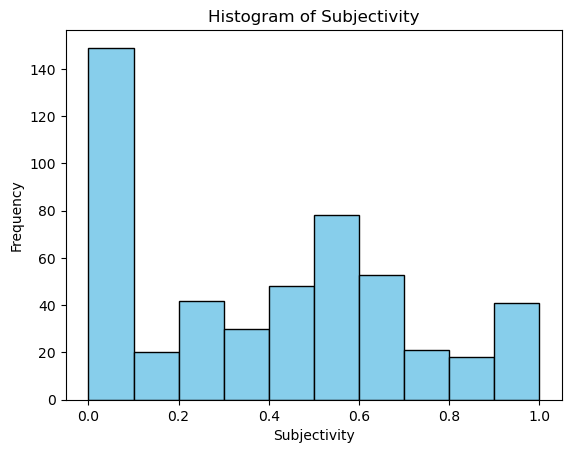

In [75]:
plot_sentiments_hist(df_cleaned_sample, 'subjectivity', 'Subjectivity', 'Histogram of Subjectivity')

The histogram illustrates a predominant concentration of opinions around 0, indicating objectivity, with the remaining values representing a blend of subjective and neutral viewpoints

In [76]:
def classify_subjectivity(subjectivity):
    """
    Classifies polarity into three categories: Objective, Subjective, or Neutral based on the given subjective value.

    Parameters:
    - subjectivity (float): The subjectivity value to classify.

    Returns:
    - str: The classification label ('Objective', 'Subjective', or 'Neutral').
    """
    if subjectivity < 0.5:
        return 'Objective'
    elif subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Neutral'

In [77]:
# Apply the classify_subjectivity function to each polarity value in the DataFrame
# and create a new column 'sentiment_subjectivity' to store the classification result.

df_cleaned_sample['sentiment_subjectivity'] = df_cleaned_sample['subjectivity'].apply(classify_subjectivity)

In [78]:
# Create a GeoDataFrame 'gdf_polarity' from the DataFrame 'df_cleaned_sample'
# using longitude and latitude information to generate geometries.
gdf_subjectivity = gpd.GeoDataFrame(
    df_cleaned_sample, 
    geometry=gpd.points_from_xy(df_cleaned_sample.Lon, df_cleaned_sample.Lat)
)

# Display the first few rows of the GeoDataFrame.
gdf_subjectivity.head()

user_name      user_created  \
475                                      Chamar Ariban  17/03/2010 12:31   
473                                        Adam Wittek  22/03/2016 10:58   
111  Canadian Advocacy Centre 4 Health Safety & Jus...  10/09/2020 19:03   
318                           CHEManager International  14/01/2010 07:42   
13                                    Chemist+Druggist  10/02/2009 10:00   

     user_followers  user_friends  user_favourites  user_verified  \
475              86           345            13978          False   
473             292           251              844          False   
111             606          2050              735          False   
318            3548          1198              467          False   
13            19112          1790             7041           True   

                 date               source  retweets  favorites  ...  \
475  28/08/2021 03:42   Twitter for iPhone         0          1  ...   
473  16/05/2021 11:35  Twitter for Android         0          1  ...   
111  11/01/2021 01:20      Twitter Web App         0          1  ...   
318  22/02/2021 07:55            TweetDeck         0          0  ...   
13   20/01/2021 15:27            TweetDeck         0          1  ...   

                                        cleaned_tweets  \
475                      ChatGPT Oxford admission soon   
473  Ill stop sharing also asked ChatGPT write rap ...   
111                Im impressednnOpenAi ChatGPT OpenAI   
318  new post WeeknOpenAIs New ChatGPT Might First ...   
13   mind blowing thread read year tech space AI ro...   

                                              location        Lat         Lon  \
475  DLTBCo Pasay City Bus Depot, Zone 2, District ...  14.553831  120.993548   
473    London, Greater London, England, United Kingdom  51.489334   -0.144055   
111                                             Canada  61.066692 -107.991707   
318  Weinheim, Rhein-Neckar-Kreis, Baden-Württember...  49.546235    8.671746   
13     London, Greater London, England, United Kingdom  51.489334   -0.144055   

            country  polarity  sentiment_polarity subjectivity  \
475     Philippines  0.000000             Neutral     0.000000   
473  United Kingdom  0.100000             Neutral     0.800000   
111          Canada  0.000000             Neutral     0.000000   
318         Germany  0.305682            Positive     0.460606   
13   United Kingdom  0.285714            Positive     0.535714   

     sentiment_subjectivity                     geometry  
475               Objective   POINT (120.99355 14.55383)  
473              Subjective    POINT (-0.14406 51.48933)  
111               Objective  POINT (-107.99171 61.06669)  
318               Objective     POINT (8.67175 49.54623)  
13               Subjective    POINT (-0.14406 51.48933)  

[5 rows x 21 columns]

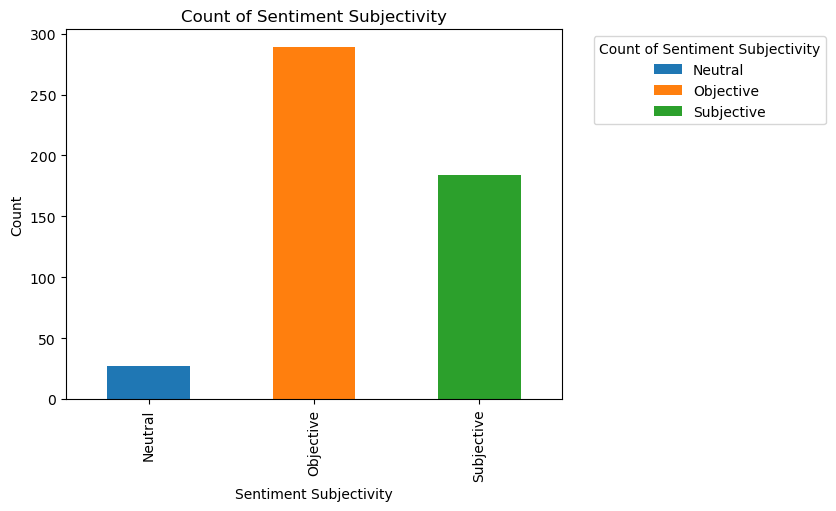

In [80]:
plot_sentiment_count(gdf_subjectivity, 'sentiment_subjectivity', 'Sentiment Subjectivity', 'Count of Sentiment Subjectivity')

In my sample, objective counts are the most frequent, followed by subjective counts, with neutral counts being the least frequent.

In [100]:
world_map_plot(gdf_subjectivity, "sentiment_subjectivity", "Subjectivity Sentiments In World", sentiment_type="subjectivity")

In [101]:
world_map_plot(gdf_subjectivity, "sentiment_subjectivity", "Subjectivity Sentiments In Europe", "natural earth", "europe", sentiment_type="subjectivity")

<div style="display: flex; flex-direction: column; align-items: center;">
    <div style="flex: 1; border-right: 2px solid #000; height: 400px; padding: 20px; text-align: center; overflow-y: auto;">
        <h2>Sujectivity Map of UK</h2>
        <img src="images/uk_subjectivity.JPG" alt="Polarity Map of UK" style="width: 200px; height: auto; margin-bottom: 10px;" />
        <p style="text-align: justify; font-size: 16px; line-height: 1.6; color: #333;"> 
            The map depicts predominantly objective opinions concerning ChatGPT, contrasting sharply with the prevalence of neutral sentiments, indicating lower satisfaction levels. Conversely, subjective counts are also significant, suggesting a higher level of agreement with the usage of ChatGPT.
        </p>
    </div>
    <div style="flex: 1; border-left: 2px solid #000; height: 400px; padding: 20px; text-align: center; overflow-y: auto;">
        <h2>Sujectivity Map of Germany</h2>
        <img src="images/germany_subjectivity.jpg" alt="Polarity Map of Germany" style="width: 200px; height: auto; margin-bottom: 10px;" />
        <p style="text-align: justify; font-size: 16px; line-height: 1.6; color: #333;"> 
           In Germany, the counts of objective and subjective opinions are equal, indicating both high and low satisfaction with the usage of ChatGPT. Only one neutral response is present, suggesting a limited range of attitudes towards ChatGPT in the region.
        </p>
    </div>
</div>

In [83]:
world_map_plot(gdf_subjectivity, "sentiment_subjectivity", "Subjectivity Sentiments In USA", "albers usa", "usa", sentiment_type="subjectivity")

The dataset primarily covers the corners of the United States, showcasing a mix of subjective and objective sentiments, typical of interactions with ChatGPT. Objective sentiments dominate the map, suggesting a prevalent negative sentiment towards ChatGPT. However, neutral or subjective opinions are less common compared to objective ones, indicating a variation of sentiment landscape surrounding ChatGPT usage.

## Task 2.5 Storify/Interpretation

<p>As an advisor to a leading competitor of ChatGPT, it's imperative to provide an insightful analysis of the public sentiment surrounding ChatGPT across different regions of the world. Our analysis delves into the sentiment polarity, subjectivity, and geographic distribution of opinions to offer a comprehensive understanding of the landscape. </p>
<p>In our dataset, neutrality dominates the sentiment towards ChatGPT, with a substantial majority expressing neutral feelings. Negative sentiments are notably less frequent compared to neutral and positive sentiments. This suggests that while there may be areas of dissatisfaction, the overall sentiment tends towards a neutral stance. </p>
<p>Geospatial analysis reveals intriguing patterns across different regions. In Europe, particularly in the United Kingdom and Ireland, minimal negative feedback is observed, indicating overall satisfaction or a neutral stance towards ChatGPT. However, in Germany, the absence of positive polarity raises questions about satisfaction levels, with negative and neutral sentiments being nearly identical. </p>
<p>Moving across the Atlantic to the United States, the sentiment landscape is more nuanced. While the dataset primarily covers the corners of the country, a mix of subjective and objective sentiments is observed. Objective sentiments dominate, suggesting a prevalent negative sentiment towards ChatGPT. However, neutral or subjective opinions are less common, indicating a varied sentiment landscape. </p>
<p>Zooming out to a global scale, countries like Canada, India, Australia, and South Africa display a tendency towards neutral opinions. Conversely, China demonstrates a more subjective sentiment, while Pakistan and Japan lean towards objective viewpoints. </p>
<p>Overall, the sentiment analysis provides valuable insights for our competitor. While the majority sentiment may lean towards neutrality, the nuances within different regions highlight areas of potential concern or opportunity. Understanding the sentiment landscape is crucial for strategic decision-making and product development, ensuring alignment with customer expectations and preferences in different markets.</p>